In [12]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings.csv.gz')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]


inputDF["host_since"]= pd.to_datetime(inputDF['host_since'])
inputDF['day'] = inputDF['host_since'].dt.day
inputDF['month'] = inputDF['host_since'].dt.month
inputDF['year'] = inputDF['host_since'].dt.year
inputDF.head()

,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,day,month,year
0,1078,t,Entire home/apt,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",flexible,98.0,85.0,8,1,2013
1,2265,f,Entire home/apt,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,93.0,225.0,23,8,2008
2,5245,f,Private room,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,91.0,100.0,23,8,2008
3,5456,f,Entire home/apt,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",strict_14_with_grace_period,96.0,95.0,16,2,2009
4,5769,f,Private room,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,98.0,40.0,19,2,2009


In [24]:
inputDF = inputDF[inputDF.year > 2007]

Text(0,0.5,'number of hosts')

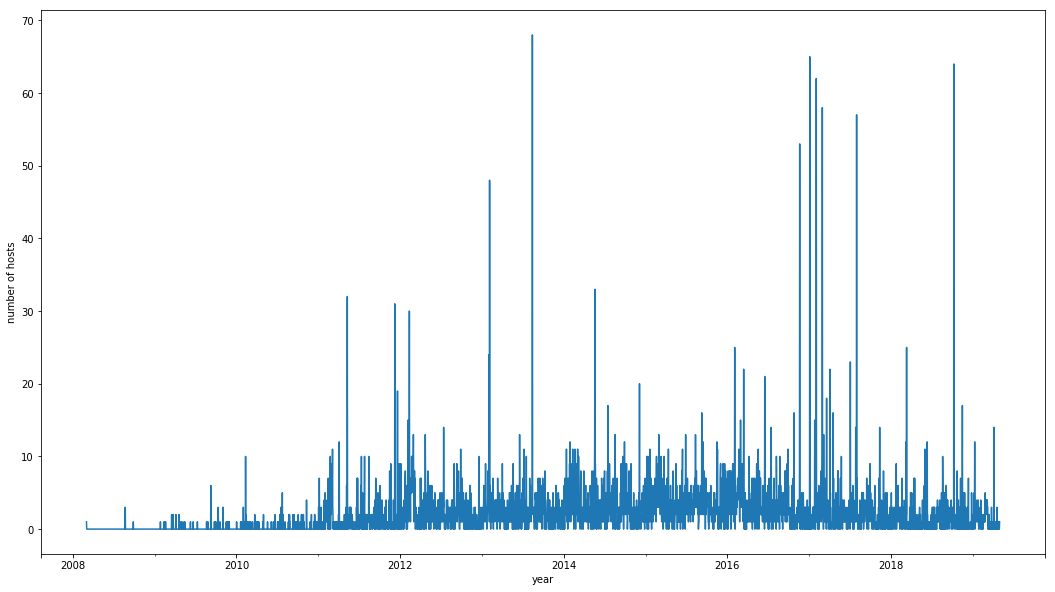

In [25]:
# this graph shows count of host registered everyday by resampling the data for each day

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0,0.5,'Number of hosts')

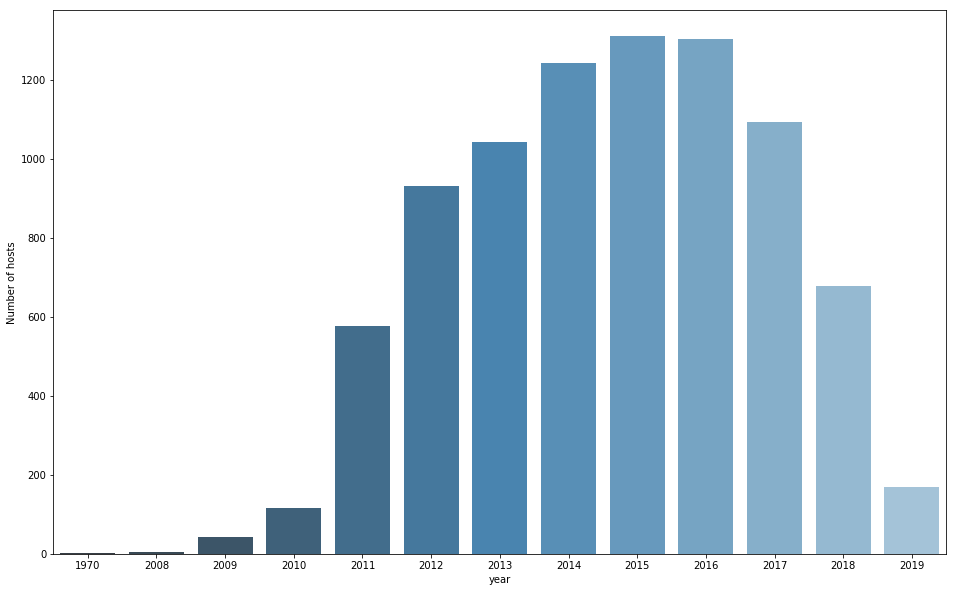

In [14]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

/Users/linhduong/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


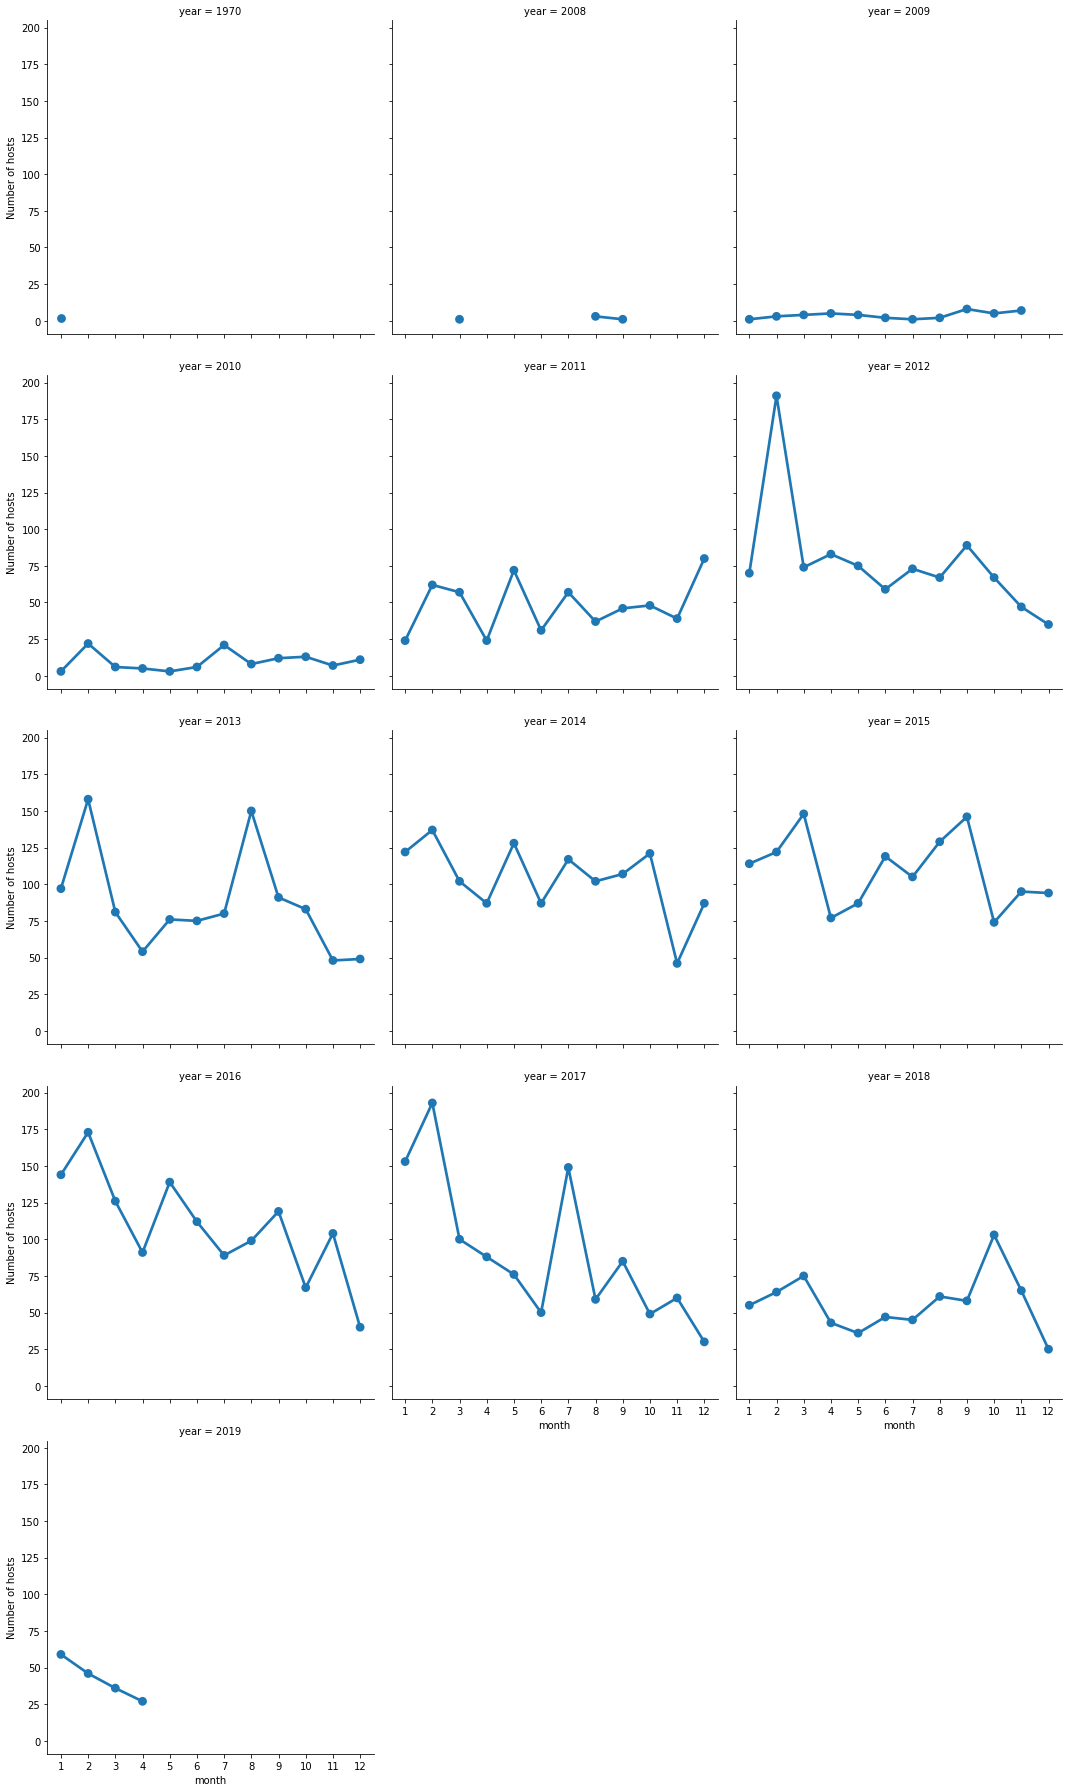

In [15]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3)

Text(0,0.5,'Number of hosts')

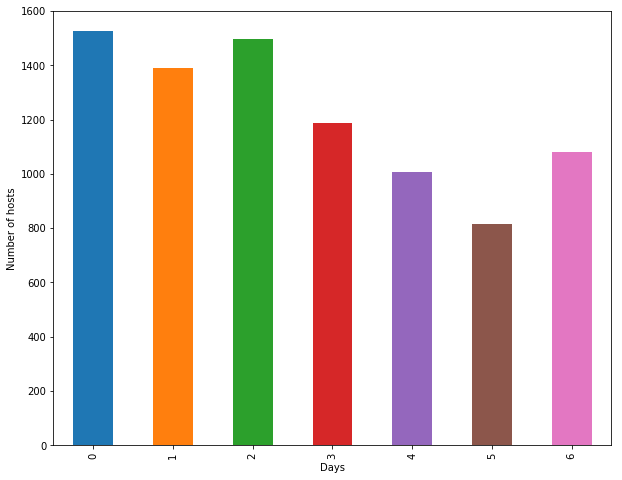

In [16]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")

In [18]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [19]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [21]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [22]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,15,98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,35,93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,25,91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,31,96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,21,98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [30]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2=train_test_split(split_data,inputDF.price, test_size=0.4,train_size = 0.6,random_state=13)

In [31]:

# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))


mean: 297.0004702562897
standard deviation: 817.327235001824


In [35]:
#!pip install -U pandas

     |████████████████████████████████| 15.9MB 2.3MB/s eta 0:00:01    |▎                               | 133kB 1.1MB/s eta 0:00:15     |█████████                       | 4.5MB 2.1MB/s eta 0:00:06     |█████████████████▎              | 8.6MB 2.6MB/s eta 0:00:03
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [46]:
train1['host_since'] = pd.to_numeric(train1.host_since)

/Users/linhduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
print(train1)

             id host_since  accommodates  bathrooms  bedrooms  beds  \
8327   25839785 2014-11-14             5        2.0       2.0   3.0   
410      727662 2011-09-21             6        1.0       2.0   3.0   
8856   27902803 2018-08-20            10        3.5       4.0   4.0   
5376   18033044 2015-04-20             2        1.0       1.0   1.0   
10464  32140772 2014-10-05             4        1.5       2.0   2.0   
8583   26894880 2018-07-14             2        1.0       1.0   1.0   
10899  32744342 2019-03-01             4        1.0       2.0   2.0   
10714  32535393 2017-01-03             8        2.0       3.0   4.0   
1452    4134923 2012-03-06             8        1.5       3.0   3.0   
1016    2355505 2014-01-28             6        1.5       3.0   4.0   
6875   22209430 2017-02-01             4        1.0       1.0   2.0   
7709   23626698 2015-11-19             6        1.0       2.0   3.0   
10839  32687820 2017-10-17             2        1.0       1.0   1.0   
2588  

In [43]:
print(train2)

8327      150.0
410       238.0
8856     2760.0
5376       30.0
10464      40.0
8583       96.0
10899     107.0
10714     236.0
1452      150.0
1016      114.0
6875     1092.0
7709      129.0
10839      70.0
2588      600.0
1211      105.0
9702      185.0
6741      185.0
2427      299.0
3753      125.0
840        99.0
9237      235.0
6842      199.0
6995       58.0
233       200.0
1082       75.0
2479       85.0
3966      176.0
4490       35.0
8364       63.0
8488      149.0
          ...  
6355       89.0
4608      194.0
5522      175.0
7941       65.0
4961      124.0
3393      125.0
7725      159.0
7432      200.0
1050      150.0
10028      55.0
11043      45.0
7394       45.0
3880      109.0
5687      202.0
82        295.0
1302       70.0
9826      250.0
1908       72.0
8536     1000.0
6770       75.0
3170      300.0
1957      535.0
9131      149.0
5595      249.0
176       100.0
8029      150.0
1087      260.0
10317     150.0
81        260.0
402       135.0
Name: price, Length: 510

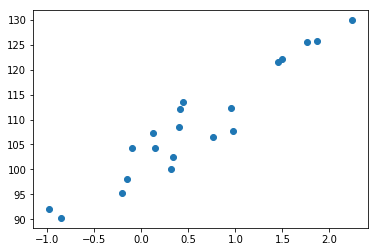

In [51]:
from sklearn.datasets import make_regression
train1, train2 = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)
plt.scatter(train1, train2)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train1, train2)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [53]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


In [57]:
predictions = model.predict(train1)
print(f"True output: {train2[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-train2[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [59]:
pd.DataFrame({"Predicted": predictions, "Actual": train2, "Error": predictions - train2})[["Predicted", "Actual", "Error"]]


,Predicted,Actual,Error
0,100.013338,98.019704,1.993634
1,106.874190,108.458654,-1.584464
2,114.071749,107.776544,6.295205
3,91.271253,90.315201,0.956053
4,89.738865,92.047965,-2.309101
5,105.790795,100.144726,5.646069
6,100.612180,104.371286,-3.759106
7,99.344051,95.208967,4.135085
8,106.047142,102.505262,3.541880
9,120.482605,122.119661,-1.637056


In [62]:
x_min = train1.min()
x_max = train1.max()

In [63]:
y_min_actual = train2.min()
y_max_actual = train2.max()

In [64]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 90.31520078064568
Calculated Min Value: 89.73886454212163
Actual Max Value: 129.85715020208258
Calculated Max Value: 129.7729907743173


In [65]:
x_min

-0.977277879876411

In [66]:
y_min_predicted = model.predict(np.array(x_min).reshape(-1,1))
y_max_predicted = model.predict(np.array(x_max).reshape(-1,1))
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


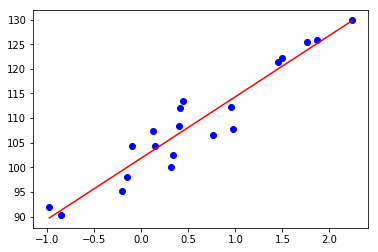

In [67]:
plt.scatter(train1, train2, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(train1)

# Score the prediction with mse and r2
mse = mean_squared_error(train2, predicted)
r2 = r2_score(train2, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 11.933040779746149
R-squared (R2 ): 0.903603363418708
